# Chapter 4 - Simple Statistical Techniques for Univariate and Bivariate Analyses

In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import scipy
from scipy import stats

## Spearman’s Rho

Spearman’s Rho (denoted as $ \rho $ or $ r_s $) is a non-parametric measure of rank correlation that assesses the strength and direction of the monotonic relationship between two variables. Unlike Pearson's correlation, which measures linear relationships, Spearman's Rho evaluates how well the relationship between two variables can be described using a monotonic function.

When to Use Spearman’s Rho?

    Non-Normal Data: When one or both variables are not normally distributed.

    Ordinal Data: When data are in ranked form (e.g., ratings, preferences).
 
    Non-Linear Relationships: When the relationship between variables is monotonic but not linear.

    Small Sample Sizes: Works well with small datasets, where parametric methods may not be appropriate.

Advantages

* Non-Parametric: Does not assume normality or linearity.
* Robust to Outliers: Less sensitive to outliers than Pearson's correlation.
* Handles Ordinal Data: Suitable for variables measured on an ordinal scale.
  
Limitations

* Monotonic Relationships Only: Cannot detect non-monotonic relationships.
* Rank Ties: Requires adjustments for tied ranks, which can reduce accuracy.

### Example

In [6]:
# Dataset

x = [0, 2, 6, 7, 15]
y = [0, 1, 8, 13, 20]

df = pd.DataFrame(x, y)
df

,0
0,0
1,2
8,6
13,7
20,15


To compare and contrast a Spearman correlation with a Pearson correlation, consider the following data on two generic variables. We first compute Pearson r to see what we get.

In [8]:
# Pearson
scipy.stats.pearsonr(x,y)

PearsonRResult(statistic=0.973647485990732, pvalue=0.005114965936522742)

We can see that the correlation between x and y is equal to 0.97 and is statistically significant with a p-value of 0.005. That it is statistically significant is not the issue for
now. The size of it is, however, and we see that it is quite large and impressive. Now,
let us try a Spearman rho on the same data:

In [10]:
# Spearman
scipy.stats.spearmanr(x,y)

SignificanceResult(statistic=0.9999999999999999, pvalue=1.4042654220543672e-24)

We can see that Spearman’s rho is equal to 1.0 (rounded up), also statistically significant. But why is Spearman a perfect correlation and Pearson not? Look at the data
once more. Notice that for every increase in x, there is a corresponding increase in y.
This is exactly what Spearman’s measures, **the monotonic increase in one variable
as a function of another**, regardless of whether or not the relationship is linear. With
Pearson, it assesses linearity, and hence the correlation will be less. A plot of the data
will help shed light on why Spearman is higher than Pearson here:

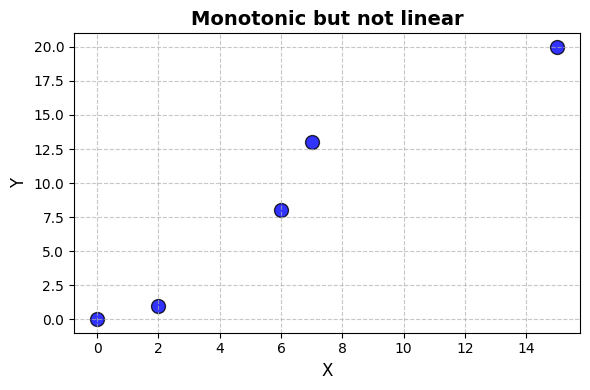

In [12]:
# Create the scatter plot
plt.figure(figsize=(6, 4))  # Set the figure size
plt.scatter(
    x,                      # X-axis data
    y,                      # Y-axis data
    color="blue",           # Set marker color to blue
    edgecolor="black",      # Add a black edge to the markers
    alpha=0.8,              # Set transparency of the markers
    s=100                   # Increase marker size for better visibility
)

# Add labels and title
plt.xlabel("X", fontsize=12)                                        # Label for the X-axis
plt.ylabel("Y", fontsize=12)                                        # Label for the Y-axis
plt.title("Monotonic but not linear", fontsize=14, fontweight="bold")  # Add a title with bold font

plt.grid(visible=True, linestyle="--", alpha=0.7)  # Add a grid

# Adjust layout and show the plot
plt.tight_layout()  # Adjust layout
plt.show()          # Display the plot

### Computing Correlation

In [14]:
np.random.seed(18)

x = np.random.randint(0, 50, 1000)
y = x + np.random.normal(0, 10, 1000)

np.corrcoef (x, y)

array([[1.        , 0.81603466],
       [0.81603466, 1.        ]])

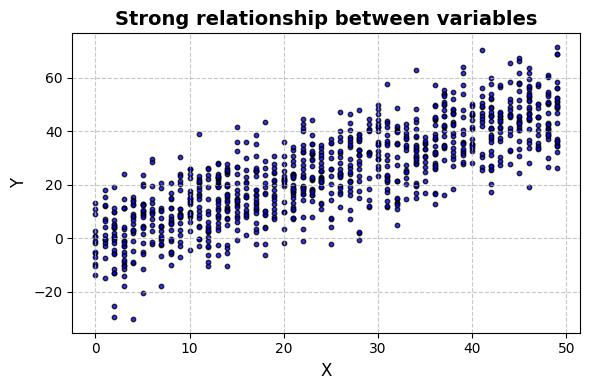

In [15]:
# Create the scatter plot
plt.figure(figsize=(6, 4))  # Set the figure size
plt.scatter(
    x,                      # X-axis data
    y,                      # Y-axis data
    color="blue",           # Set marker color to blue
    edgecolor="black",      # Add a black edge to the markers
    alpha=0.8,              # Set transparency of the markers
    s=10                   # Increase marker size for better visibility
)

# Add labels and title
plt.xlabel("X", fontsize=12)                                        # Label for the X-axis
plt.ylabel("Y", fontsize=12)                                        # Label for the Y-axis
plt.title("Strong relationship between variables", fontsize=14, fontweight="bold")  # Add a title with bold font

plt.grid(visible=True, linestyle="--", alpha=0.7)  # Add a grid

# Adjust layout and show the plot
plt.tight_layout()  # Adjust layout
plt.show()          # Display the plot

In [16]:
url1 = ('https://raw.githubusercontent.com/WinVector/WinVector.github.io/25d28151e108a70c676bf548579cf67d701ef527/IntroductionToDataScience/Sec02_Lesson005_LRTheory/Galton.csv')

galton = pd.read_csv(url1)

galton.head()

,Child,Midparent
0,61.7,70.5
1,61.7,68.5
2,61.7,65.5
3,61.7,64.5
4,61.7,64.0


In [17]:
pearson_coef, p_value = stats.pearsonr(galton["Child"], galton["Midparent"])

print("Pearson Correlation: ", pearson_coef, "and a P-value of:",p_value)

Pearson Correlation:  0.4587623682928224 and a P-value of: 1.7325092920157635e-49


We can see from the above that the correlation between parent and child height is equal
to 0.46, and has an exceedingly small p-value. Hence, it is statistically significant, and
we can reject the null hypothesis that the true correlation in the population from which
these data were drawn is equal to 0.

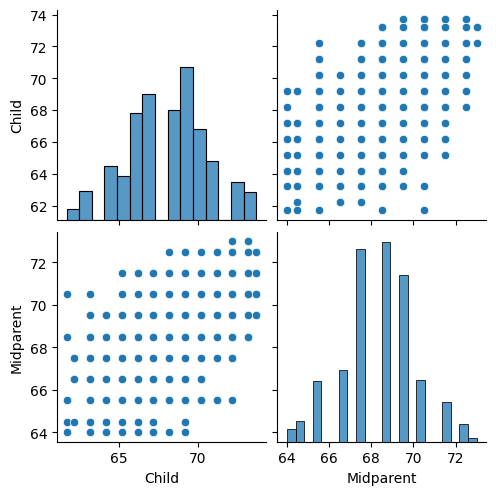

In [19]:
sns.pairplot(galton);

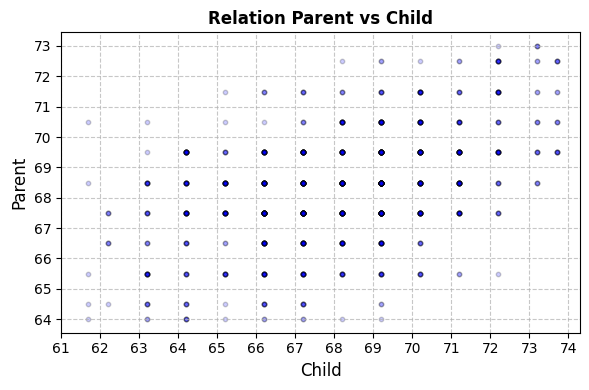

In [20]:
parent = galton['Midparent']
child = galton['Child']

# Create the scatter plot
plt.figure(figsize=(6, 4))  # Set the figure size
plt.scatter(
    x = child,              # X-axis data
    y = parent,             # Y-axis data
    color="blue",           # Set marker color to blue
    edgecolor="black",      # Add a black edge to the markers
    alpha=0.2,              # Set transparency of the markers
    s=10                    # Increase marker size for better visibility
)

# Add labels and title
plt.xlabel("Child", fontsize=12)                                       # Label for the X-axis
plt.ylabel("Parent", fontsize=12)                                      # Label for the Y-axis
plt.title("Relation Parent vs Child", fontsize=12, fontweight="bold")  # Add a title with bold font

# Set both axes to have ticks with a step of 1
x_min, x_max = int(child.min()), int(child.max())    # Get min and max of X-axis
y_min, y_max = int(parent.min()), int(parent.max())  # Get min and max of Y-axis

plt.xticks(range(x_min, x_max + 2, 1))               # Set X-axis ticks with a step of 1
plt.yticks(range(y_min, y_max + 1, 1))               # Set Y-axis ticks with a step of 1

plt.grid(visible=True, linestyle="--", alpha=0.7)    # Add a grid

# Adjust layout and show the plot
plt.tight_layout()         # Adjust layout
plt.show()                 # Display the plot

## T-Tests for Comparing Means

### One-sample t-test

In [23]:
iq = [105, 98, 110, 105, 95]

df = pd.DataFrame(iq)

df

,0
0,105
1,98
2,110
3,105
4,95


We can conduct the one-sample t-test, listing first the dataframe (df), followed by the population mean under the null hypothesis, which for our data is equal to 100:

In [25]:
stats.ttest_1samp(df, 100.0)

TtestResult(statistic=array([0.9649505]), pvalue=array([0.38921348]), df=array([4]))

In [26]:
# Perform the t-test
result = stats.ttest_1samp(df, 100.0)

# Extract scalar values from arrays
stat, pvalue = result.statistic[0], result.pvalue[0]

# Print the results
print(f't-statistic: {stat:.4f}')
print(f'    p-value: {pvalue:.4f}')

t-statistic: 0.9650
    p-value: 0.3892


    p-value (0.3892) > alpha (0.05); H0: Fail to reject null hypothesis, therefore mu = 100.
    
    t-statistic (0.9650) indicates that the sample mean is less than 1 standard deviation away from the hypothesized population mean (100).

## Two-sample t-test

In [29]:
stats.ttest_ind(parent, child)

TtestResult(statistic=2.167665371332533, pvalue=0.030311049956448916, df=1854.0)

In [30]:
# Perform the t-test
stat, pvalue = stats.ttest_ind(parent, child)

# Print the results
print(f't-statistic: {stat:.4f}')
print(f'    p-value: {pvalue:.4f}')

t-statistic: 2.1677
    p-value: 0.0303


    p-value (0.0303) < alpha (0.05); Ha: We reject null hypothesis, therefore we can conclude a mean population difference between parent and child.

    t-statistic (2.1677) indicates that the mean difference between the two groups (parent and child) is slightly more than 2 standard errors away from 0.

Be sure to note that these hypotheses are about population parameters, not sample statistics.

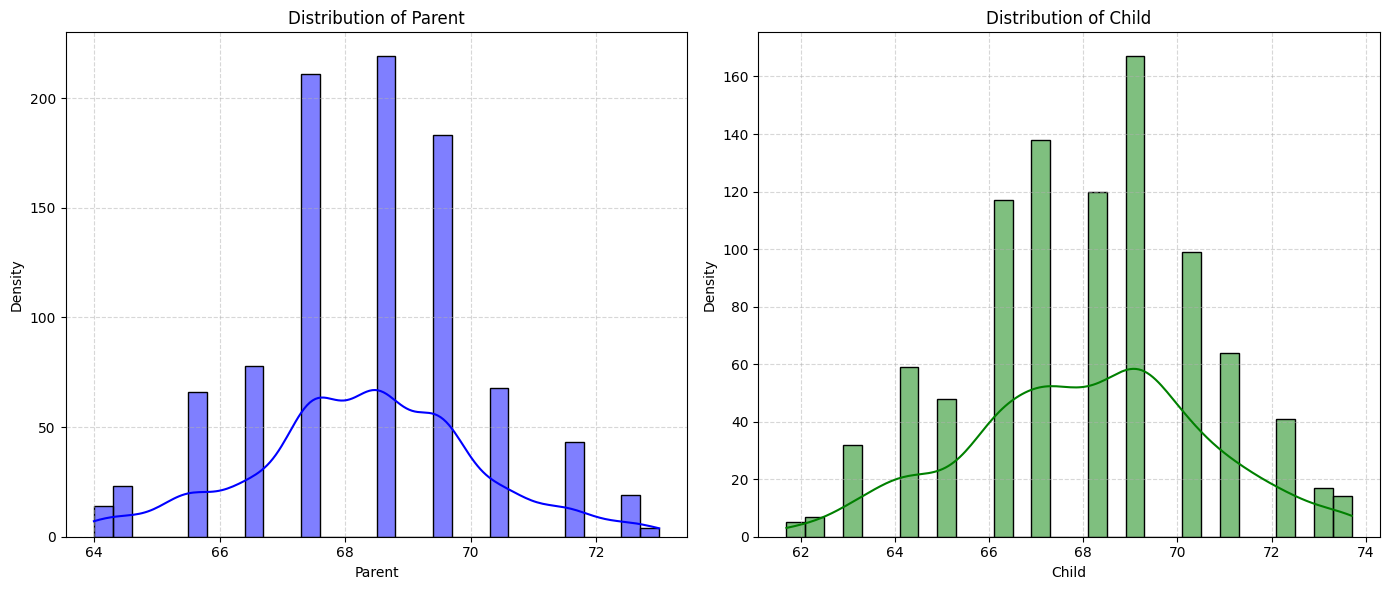

In [33]:
# Create a 1x2 grid of subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))                

# Plot the distribution of 'parent' on the first subplot
sns.histplot(parent, kde=True, ax=axes[0], color="blue", bins=30)  # KDE with histogram
axes[0].set_title("Distribution of Parent", fontsize=12)           # Add a title
axes[0].set_xlabel("Parent", fontsize=10)                          # Label for X-axis
axes[0].set_ylabel("Density", fontsize=10)                         # Label for Y-axis
axes[0].grid(True, linestyle='--', alpha=0.5)                      # Add a grid

# Plot the distribution of 'child' on the second subplot
sns.histplot(child, kde=True, ax=axes[1], color="green", bins=30)  # KDE with histogram
axes[1].set_title("Distribution of Child", fontsize=12)            # Add a title
axes[1].set_xlabel("Child", fontsize=10)                           # Label for X-axis
axes[1].set_ylabel("Density", fontsize=10)                         # Label for Y-axis
axes[1].grid(True, linestyle='--', alpha=0.5)                      # Add a grid

# Adjust layout and Diplay
plt.tight_layout()                                          
plt.show()                                                         

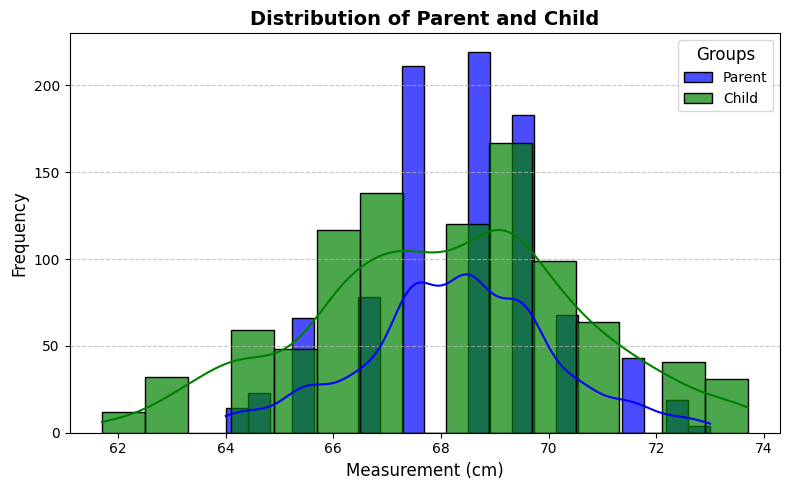

In [34]:
# Create the plot with a specific figure size
plt.figure(figsize=(8, 5))

# Plot the histogram for 'parent' directly
sns.histplot(
    parent,                        # Pass the Series directly
    color="blue",                  # Set the color of the bars for parent
    label="Parent",                # Add a label for the legend
    alpha=0.7,                     # Set transparency for better overlap visibility
    kde=True                       # Add a Kernel Density Estimate (smooth line)
)

# Plot the histogram for 'child' directly
sns.histplot(
    child,                         # Pass the Series directly
    color="green",                 # Set the color of the bars for child
    label="Child",                 # Add a label for the legend
    alpha=0.7,                     # Set transparency for better overlap visibility
    kde=True                       # Add a Kernel Density Estimate (smooth line)
)

# Add labels and title to the plot
plt.xlabel("Measurement (cm)", fontsize=12)           # X-axis label
plt.ylabel("Frequency", fontsize=12)                  # Y-axis label
plt.title("Distribution of Parent and Child", fontsize=14, fontweight='bold')  # Title

plt.legend(fontsize=10, title="Groups", title_fontsize=12)  # Add a legend
plt.grid(axis='y', linestyle='--', alpha=0.7)               # Add gridlines

# Display the plot
plt.tight_layout()  # Adjust layout
plt.show()          # Render the plot

We see from these plots that each population is relatively approximately normally distributed. Hence, we can say that one assumption for the t-test, that of normality of
populations, is probably at least tentatively satisfied. For the t-test, we also require
that the variances in each population are equal as well. Informally at least, the variances for each population also appear to be quite similar based on the plots, as the
spread along the x-axis appears to be quite similar. However, if you try a Levene test
on this data using `stats.levene(child, parent, center = ‘mean’)`, you will
reject the null of equal variances. Levene’s test is a test for the equality of variances in
the population, though its p-value is also quite sensitive to sample size. Use these tests
as a guide only.

## Levene’s Test – Testing Homoscedasticity

Levene’s test checks whether two or more groups have equal variances.

              Null Hypothesis (𝐻0): The variances of the groups are equal.
       Alternative Hypothesis (𝐻1): At least one group has a different variance.

In [62]:
# Perform Levene's test
tstat, p = stats.levene(child, parent, center = 'mean')  # use 'mean' if distribution has some symmetry, 
                                                         # use 'median' if distribution is assymetric

# Print the results
print(f"Levene's Test Statistic = {tstat:.4f}, p-value = {p:.4f}")

Levene's Test Statistic = 108.7557, p-value = 0.0000


    We have a p-value (0.0000) < alpha (0.05). For a 95% confidence level we reject the null hypothesis. 
    In this case, they have a different variance. 
    There is enough evidence to conclude that the variances of these two groups are not equal.

## Box Plot Insights

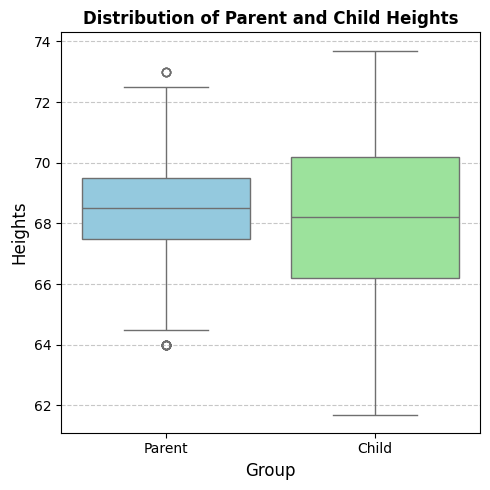

In [87]:
# Combine the data into a single DataFrame for easier plotting
data = pd.DataFrame({
    "Heights": pd.concat([parent, child]),                      # Combine parent and child into one column
    "Group": ["Parent"] * len(parent) + ["Child"] * len(child)  # Label each group
})

# Create the boxplot
plt.figure(figsize=(5, 5))                                                         # Set figure size
sns.boxplot(
    y="Heights",            # Heights to plot
    x="Group",              # Groups on the X-axis
    data=data,              # DataFrame containing the data
    hue="Group",            # Tie colors to the Group variable
    dodge=False,            # Avoid splitting into multiple boxes for same group
    palette=["skyblue", "lightgreen"]  # Define colors
)

# Add labels and title
plt.title("Distribution of Parent and Child Heights", fontsize=12, fontweight='bold')  # Add a title
plt.xlabel("Group", fontsize=12)                                                       # Label for X-axis
plt.ylabel("Heights", fontsize=12)  # Label for Y-axis
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines for Y-axis

# Display the plot
plt.tight_layout()
plt.show()

## Paired-Samples t-Test